In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt

# PART 2B: Higher Order Logistic Regression 
Next we perform a similar logistic regression task using a new set of data. In this case we have two measurements for a microchip, call them V1 and V2, and the prediction is if the chip will pass or fail quality assurance.

Lets have a look at the data first:

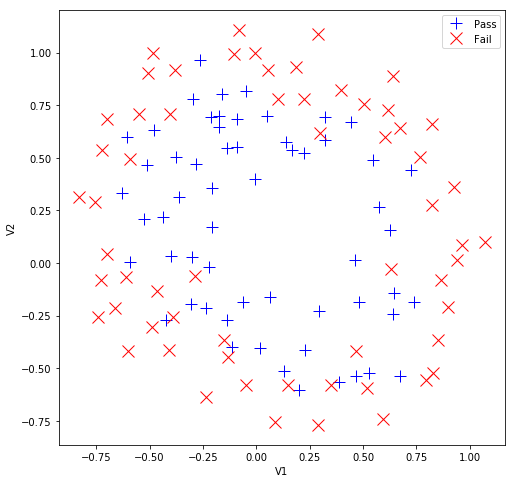

In [45]:
data = np.loadtxt('./ex2data2.txt',float,delimiter=',')
V1,V2,y = data[:,0],data[:,1],data[:,2]

ye,no = np.where(y == 1)[0],np.where(y == 0)[0] 

F  = plt.figure(figsize=(8,8))
ax = F.add_subplot(111)
ax.plot(V1[ye],V2[ye],'b+',ms=12,label='Pass')
ax.plot(V1[no],V2[no],'rx',ms=12,label='Fail')
ax.legend()
ax.set_xlabel('V1')
ax.set_ylabel('V2')
plt.show()

You can see in this case that there is obviously not a simple line that can roughly separate pass and fail for this data set. In this case we will create new features by combining V1 and V2, for example V1^2, V2^2, (V1)x(V2^3), etc. The below function will map the input features to output features with exponents up to a degree of 5:

In [81]:
def mapFeature(x1,x2,degree=5):
    out = np.zeros(len(x1))+1.
    for i in range(degree+1):
        for j in range(0,i):
            out = np.vstack((out,(x1**(i-j))*(x2**j)))
    return out

x = mapFeature(V1,V2)
print(f'Number of observations = {V1.shape}')
print(f'Number of features = {x.shape[0]}')

Number of observations = (118,)
Number of features = 16


Now our input is a 16 by 118 matrix, 16 features for the 118 observations. This means that we need to optimize theta employing out sigmoid cost function, but for a theta with 16 values. We'll define the required cost and gradient functions now:

In [82]:
def sigmoid(z):
    return 1./(1.+np.exp((-1.)*z))

def h(theta,x):

    zz = np.sum(theta*np.transpose(x),axis=1)
    
    return sigmoid(zz)

def one_h(theta,x):
    zz = np.dot(theta,x)
    return sigmoid(zz)

def cost(theta,x,y,lam=.01):

    f1 = (-1.)*y*np.log(h(theta,x))
    f2 = (y-1.)*np.log(1.-h(theta,x))
    return (np.sum(f1+f2)/float(len(y)))+((lam/(2.*float(len(y))))*np.sum(theta*theta))


def grad(theta,x,y,lam=.01):

    f1 = np.sum((h(theta,x)-y)*x,axis=1)
    f2 = lam*(theta)
    f2[0] = 0.
    return (f1+f2)/float(len(y))

In [83]:
# NOW INITIALISE THETA AS AN ARRAY OF ZEROS WITH A LENGTH OF 16:
T = np.zeros(x.shape[0])

# RUN THE OPTIMIZER:
Res = opt.minimize(fun = cost,
                          x0 = T,
                          args = (x,y),
                          method = 'TNC',
                          jac = grad)

opt_T = Res.x
print(f'Optimal Theta = {opt_T}')

Optimal Theta = [  0.73627727  -0.05548141   4.43799955  -5.70099426   6.49182958
   8.15103192  -0.95324526 -13.69253865   0.18367638 -15.80133018
   7.6034633   -3.98713898  -1.97829714   4.41327199  -9.64188076
  -4.24666329]


Now lets check the prediction:

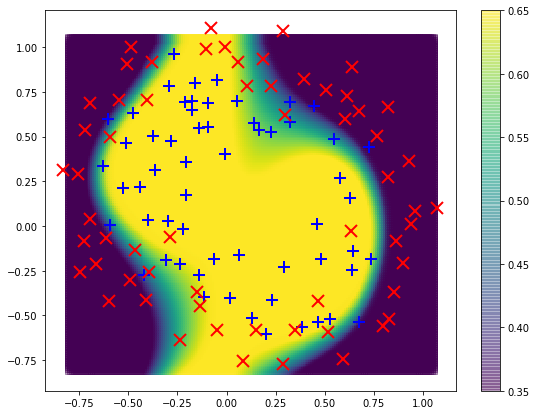

In [86]:
xx = np.arange(-.8,1.06,.01)
xv,yv = np.meshgrid(xx,xx)
hh = np.zeros(xv.shape)
for i in range(len(xx)):
    xt = mapFeature(xv[:,i],yv[:,i])
    zt = np.sum(opt_T*xt.transpose(),axis=1)
    hh[:,i] = sigmoid(zt)


    
F  = plt.figure(figsize=(9.2,7))
ax = F.add_subplot(111)
ax.plot(V1[ye],V2[ye],'b+',ms=12,mew=2)
ax.plot(V1[no],V2[no],'rx',ms=12,mew=2)
sc = ax.scatter(xv,yv,80,marker='s',c=hh,alpha=0.4,vmin=0.35,vmax=0.65)
cb = plt.colorbar(sc)
plt.show()